## Import Libraries

In [1]:
#pip install prettytable

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable

In [3]:
file_path = "C:/Users/mihir/Downloads/MBA IT SEM 2/DWH/Project/archive/heart.csv"
df = pd.read_csv(file_path)
columns = columns_of_interest = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

## Pre-processing

### Checking for Null Values

In [4]:
null_values = df[columns].isnull().sum()
print("Null Values:\n",null_values)

Null Values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


### Checking for Duplicate Values

In [5]:
duplicate_values = df[columns].duplicated().sum()
print("\nDuplicate Values:", duplicate_values)


Duplicate Values: 1


In [6]:
duplicate_rows = df[df.duplicated(subset=columns_of_interest, keep=False)]
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
163   38    1   2     138   175    0        1       173     0      0.0    2   
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
163    4      2       1  
164    4      2       1  


### Checking the data types

In [7]:
data_types = df[columns].dtypes
print("\nData Types:\n",data_types)


Data Types:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


## Exploratory Data Analysis

### Count of distribution of Heart Disease

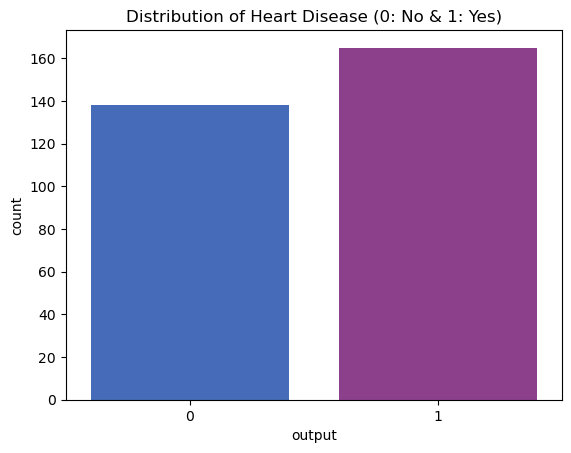

In [8]:
sns.countplot(x='output', data = df, palette=['#3366cc', '#993399'])
plt.title("Distribution of Heart Disease (0: No & 1: Yes)")
plt.show()

### Age Distribution

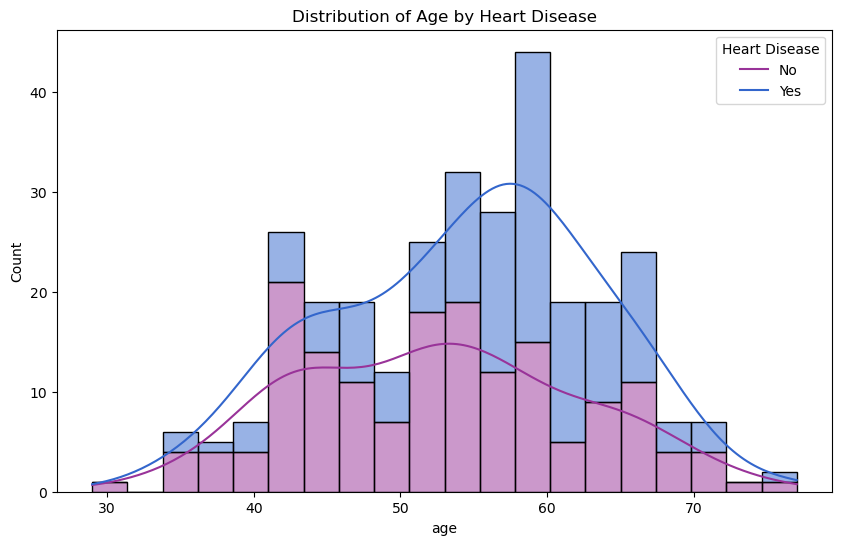

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, bins=20, kde= True, hue= 'output', multiple='stack', palette=['#3366cc', '#993399'])
plt.title("Distribution of Age by Heart Disease")
plt.legend(title= "Heart Disease", labels=['No','Yes'])
plt.show()

### Noise Identification

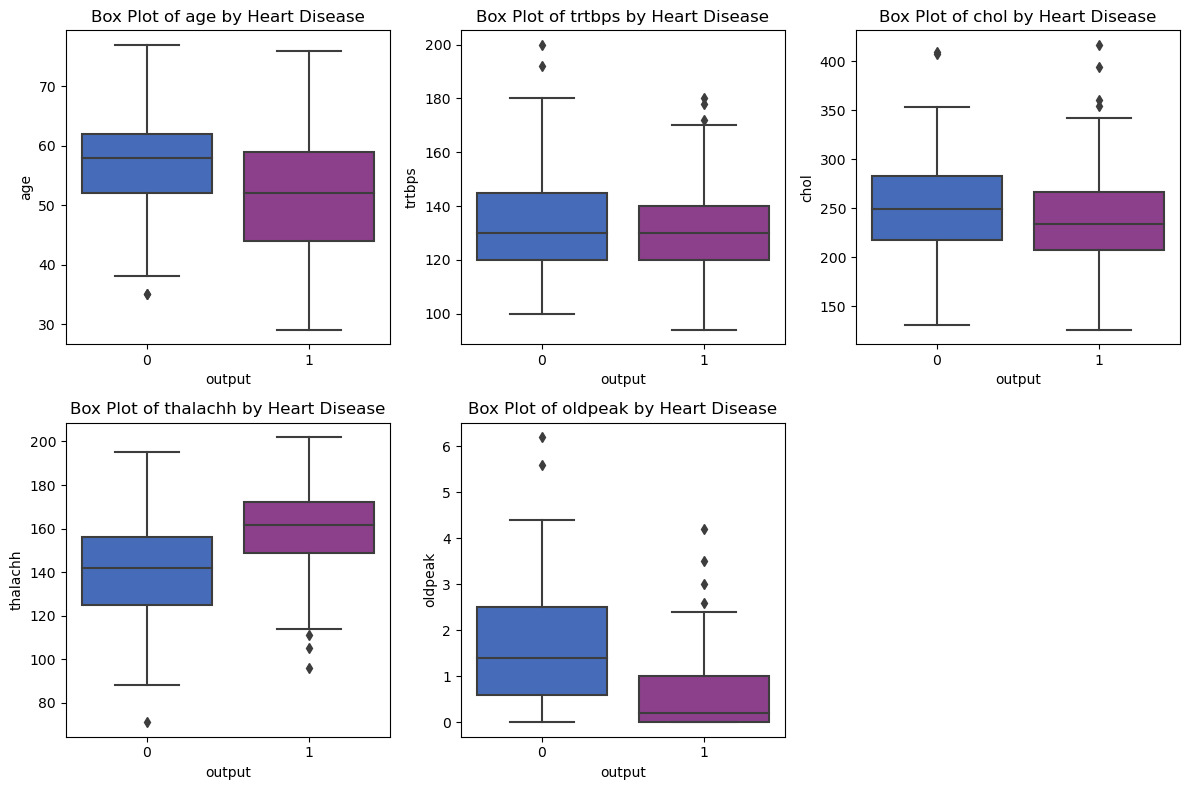

In [18]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2 ,3, i)
    sns.boxplot(x='output', y=feature, data=df, palette=['#3366cc', '#993399'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

### Correlation Matrix

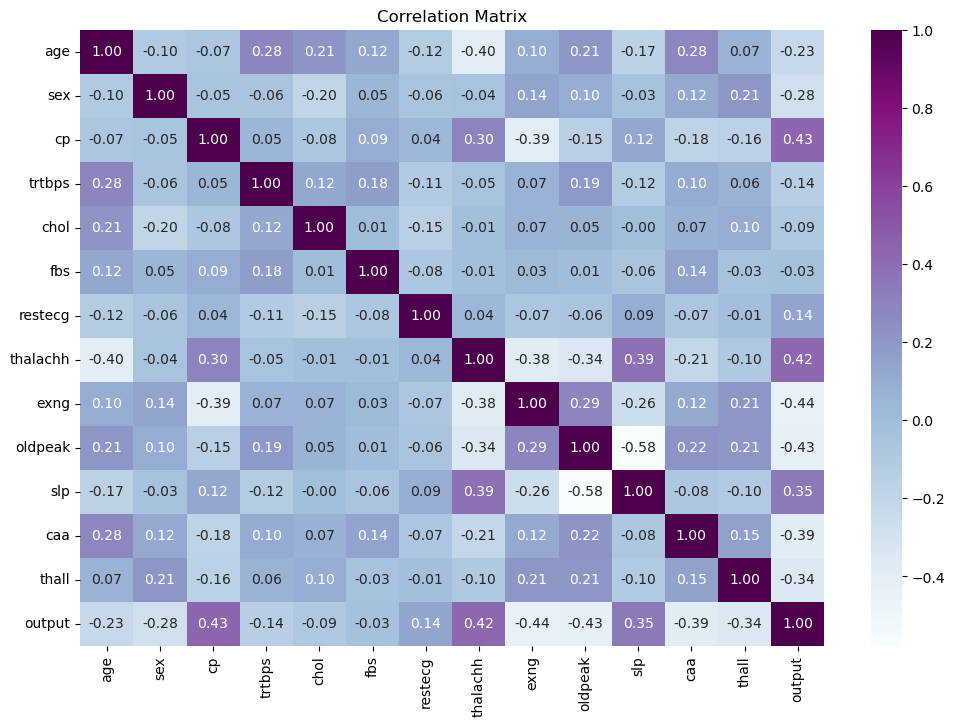

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot = True, cmap="BuPu", fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Split & Models

In [12]:
X = df.drop('output', axis = 1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

Logistic Regression Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



<function matplotlib.pyplot.show(close=None, block=None)>

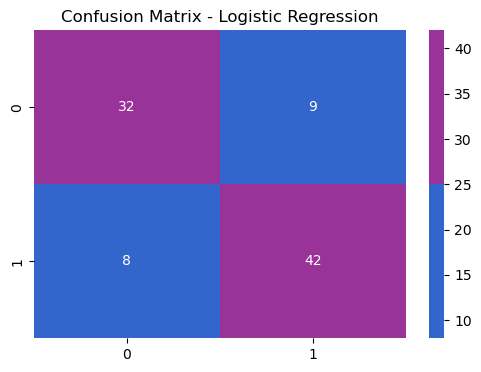

In [13]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d', cmap=sns.color_palette(['#3366cc','#993399']))
plt.title('Confusion Matrix - Logistic Regression')
plt.show

### Random Forest

Random Forest Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



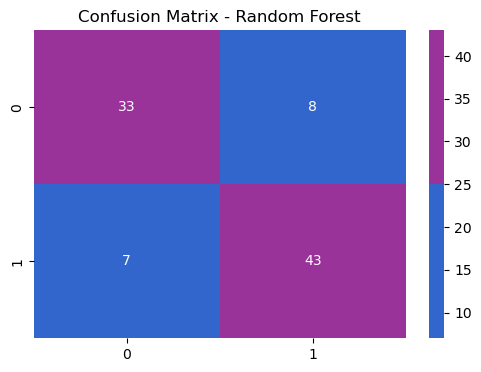

In [14]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc','#993399']))
plt.title('Confusion Matrix - Random Forest')
plt.show()

### KNN

KNN Accuracy: 0.87
Classification Resport:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



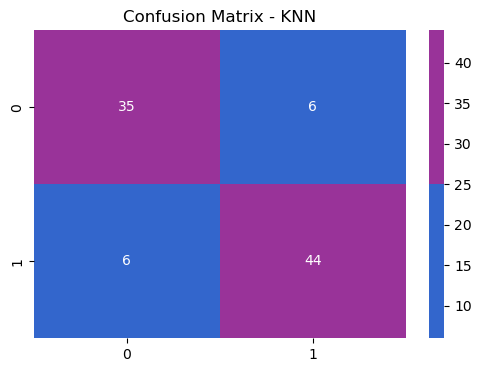

In [15]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Resport:\n', classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - KNN')
plt.show()

## Models Summary

In [16]:
models = ['Logistic Regression', 'Random Forest', 'KNN']
accuracies = [accuracy, accuracy_rf, accuracy_knn]

table = PrettyTable()
table.field_names = ['Model', 'Accuracy']

color_codes = {
    'Logistic Regression' : '\033[91m',
    'Random Forest' : '\033[93m',
    'KNN' : '\033[92m'
}

for model, accuracy in zip(models, accuracies):
    
    colored_model = f'{color_codes[model]}{model}\033[0m'
    colored_accuracy = f'{color_codes[model]}{accuracy:.2%}\033[0m'
    table.add_row([colored_model, colored_accuracy])
    
print(table)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |  81.32%  |
|    Random Forest    |  83.52%  |
|         KNN         |  86.81%  |
+---------------------+----------+
